# Feladat 5 (2 pont)

A hasadó élesztő [(*Schizosaccharomyces pombe*)](https://en.wikipedia.org/wiki/Schizosaccharomyces_pombe) a sejtnövekedés egyik gyakran használt modellorganizmusa a sejtbiológiában. Hengeres sejtjei kizárólag hosszirányban nőnek, így a sejt teljes térfogata arányos a sejthosszal, ami könnyen mérhető. Sejtnövekedés a sejtciklusuk kb. 75%-ban történik, ezt követi a konstans hosszúsági fázis, amikor a sejthossz változatlan, a sejtek az osztódásra készülnek.

A növekedési szakaszt több különböző függvénnyel is leírhatjuk, erre példa a bilineáris (linearizált biexponenciális) függvény, mely a következő képlettel írható le: $$CL=\eta\cdot \ln[e^{\frac{\alpha_1(t−\tau)}{\eta}}+e^{\frac{\alpha_2(t−\tau)}{\eta}}]+\varepsilon$$

ahol CL a sejthossz, $\alpha_1$ és $\alpha_2$ a két lineáris szakasz meredeksége, $\tau$ a sebességváltási pont pozíciója, $\eta$ a törés élességére vonatkozó paraméter, $\varepsilon$ pedig egy additív konstans.

Bilineáris növekedés hátterében az áll, hogy a sejtek születésük után csak az egyik sejtvégükön nőnek, majd a ciklus egy adott pontján kezd el nőni a másik sejtvég is. Ugyanakkor a mai napig nincs a tudományban teljes egyetértés, hogy a bilineáris függvény legalkalmasabb-e a növekedés leírására vagy esetleg az egyszerűbb kétparaméteres lineáris és exponenciális modellek közül valamelyik.

A '*fissionyeast.txt*' fájlban egy példa sejt sejthosszmérésének eredményei találhatók a növekedési szakaszra (1. oszlop: idő, percben, 2. oszlop: Sejthossz (CL), $\mu$m-ben).

 - Az adatok beolvasása után illessz az adatsorra egy bilineáris, egy lineáris ($CL = a\cdot t+b$) és egy exponenciális ($CL = \alpha \cdot e^{\beta\cdot t}$) függvényt majd ezeket ábrázold is! A bilineáris függvény illesztése esetében $\eta$ paraméter értékére állíts be 0.05 $\mu$m alsó és 0.5 $\mu$m felső limitet a `curve_fit` függvénynek!
 - Számold ki a [négyzetes hibaösszeget (SSE)](https://en.wikipedia.org/wiki/Residual_sum_of_squares) mindhárom esetre, a tapasztalatokat értékeld!
 - Mivel eltérő paraméterszámú függvényeket hasonlítunk össze, célszerű az SSE helyett inkább olyan modellszelekciós kritériumokat alkalmazni, amik súlyoznak a paraméterszámmal is, pl. [Akaike Információs Kritérium](https://en.wikipedia.org/wiki/Akaike_information_criterion): ($AIC = n_{obs}\cdot \ln(SSE) + 2\cdot n_{par}$, ahol $n_{obs}$ a mérési pontok száma, $n_{par}$ pedig a modell paramétereinek száma), határozd meg, hogy melyik függvény illik a legjobban a kapott adatsorra az AIC kritérium alapján!


In [1]:
%pylab inline
from scipy.optimize import curve_fit #szükséges packagek

Populating the interactive namespace from numpy and matplotlib


In [2]:
with open('fission_yeast.txt') as data:
    lines = data.readlines()            #beolvassuk a filet

In [3]:
time = []                                  #ezen üres tömböket fogjuk majd megtölteni 
size = []

for sor in lines[0:]:                      #végig iterálunk az egész fileon 
    time.append(float(sor.split('\t')[0])) #és közben splitteljük
    size.append(float(sor.split('\t')[1])) 
    
print(time)                                #nézzük meg őket
print(size)

[0.0, 2.5, 5.0, 7.5, 10.0, 12.5, 15.0, 17.5, 20.0, 22.5, 25.0, 27.5, 30.0, 32.5, 35.0, 37.5, 40.0, 42.5, 45.0, 47.5, 50.0, 52.5, 55.0, 57.5, 60.0, 62.5, 65.0, 67.5, 70.0, 72.5, 75.0, 77.5, 80.0, 82.5, 85.0, 87.5, 90.0, 92.5, 95.0, 97.5, 100.0, 102.5, 105.0, 107.5]
[7.685, 7.881, 7.931, 8.079, 8.175, 8.4, 8.481, 8.591, 8.748, 8.837, 8.946, 9.084, 9.227, 9.291, 9.378, 9.492, 9.623, 9.827, 9.822, 9.959, 10.076, 10.207, 10.394, 10.569, 10.621, 10.786, 10.959, 11.003, 11.132, 11.412, 11.523, 11.597, 11.797, 11.973, 12.055, 12.209, 12.458, 12.621, 12.732, 12.961, 12.973, 13.152, 13.303, 13.526]


Text(0, 0.5, 'size')

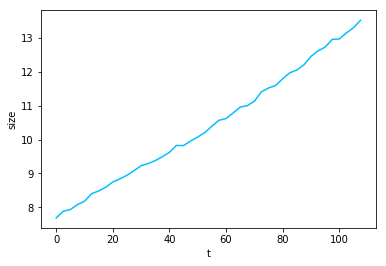

In [4]:
plot(time, size, color = 'deepskyblue') #először kiplottolom az adatsort, 
                                        #hogy jobban lehessen látni, hogy mihez kell fittelni majd
xlabel('t')
ylabel('size')

In [5]:
def bilinear(t, alpha1, alpha2, eta, epsilon, tau):
    return eta * log(exp((alpha1*(t - tau))/eta) + exp((alpha2*(t - tau))/eta)) + epsilon

def linear(t, a, b):                    #definiáljuk a fittelendő függvényeket figyelve, 
    return (a * t) + b                  #hogy a t legyen elől mindháromnál

def exponential(t, alpha, beta):
    return alpha * exp(beta * t)

## Bilineáris

In [6]:
popt_a, pcov_a = curve_fit(bilinear, time, size, p0 = [1, 1, 1, 1, 1]) #az illesztés elvégzése
perr_a = sqrt(diag(pcov_a))                                            #az illesztési paraméterek hibáinak meghatározása
print (['alpha1', 'alpha2', 'eta', 'epsilon', 'tau'])
print (popt_a)

['alpha1', 'alpha2', 'eta', 'epsilon', 'tau']
[4.74474887e-02 6.17193707e-02 7.93566678e-02 1.06879367e+01
 6.20327033e+01]


## Lineáris

In [7]:
popt_b, pcov_b = curve_fit(linear, time, size) # az illesztés elvégzése
perr_b = sqrt(diag(pcov_b))                    # az illesztési paraméterek hibáinak meghatározása
print (['a','b'])
print (popt_b)

['a', 'b']
[0.05303729 7.59233636]


## Exponenciális

In [8]:
alpha = 3                                                               #kezdeti paraméterek
beta = 0.005 

popt_c, pcov_c = curve_fit(exponential, time, size, p0 = [alpha, beta]) # az illesztés elvégzése
perr_c = sqrt(diag(pcov_c))                                             # az illesztési paraméterek hibáinak meghatározása
print (['alpha','beta'])
print (popt_c)

['alpha', 'beta']
[7.83877658e+00 5.09467612e-03]


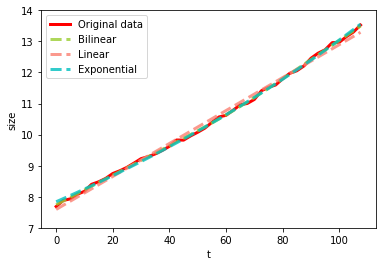

In [9]:
time = array(time) #arrayé alakítjuk a time változót

#eredeti függvény
plot(time, size, label='Original data',
     color = 'r', lw=3)

#illesztések
plot(time, bilinear(time, *popt_a), label='Bilinear',
     color = 'yellowgreen', lw=3, ls='--', alpha=0.8)

plot(time, linear(time, *popt_b), label='Linear',
     color = 'salmon', lw=3, ls='--', alpha=0.8)

plot(time, exponential(time, *popt_c), label='Exponential',
     color = 'c', lw=3, ls='--', alpha=0.8)

ylim(7, 14) #7-től 14-ig fusson az y

xlabel('t') #tengelyfeliratok
ylabel('size')

legend()

show()

## Hibák

In [11]:
#négyzetes hibaösszegek

print (perr_a)
print (perr_b)
print (perr_c)

[8.14263613e-04 1.49576334e-03 6.73273345e-02 1.75155136e-01
 3.38729901e+00]
[0.00053566 0.03343863]
[1.50850394e-02 2.71631255e-05]


Ezek alapján a lineáris közelítés volt a legeredményesebb, mert ezen értékek mutatják a legkisebb eltérést az adatsorhoz képest

 - Mivel eltérő paraméterszámú függvényeket hasonlítunk össze, célszerű az SSE helyett inkább olyan modellszelekciós kritériumokat alkalmazni, amik súlyoznak a paraméterszámmal is, pl. [Akaike Információs Kritérium](https://en.wikipedia.org/wiki/Akaike_information_criterion): ($AIC = n_{obs}\cdot \ln(SSE) + 2\cdot n_{par}$, ahol $n_{obs}$ a mérési pontok száma, $n_{par}$ pedig a modell paramétereinek száma), határozd meg, hogy melyik függvény illik a legjobban a kapott adatsorra az AIC kritérium alapján!

In [12]:
print(len(size)) #n_obs értéke lesz

44


In [13]:
#AIC módszer

err_a = 44 * log(perr_a) + (2 * 6)
err_b = 44 * log(perr_b) + (2 * 3)
err_c = 44 * log(perr_c) + (2 * 3)

print(err_a)
print(err_b)
print(err_c)

[-300.98196137 -274.2252186  -106.72031449  -64.65166107   65.6814455 ]
[-325.40837845 -143.51391364]
[-178.53827888 -456.6006081 ]


Ezek alapján levonható, hogy ismételten elrontottam valamit